In [1]:
import numpy as np


The goal of the notebook is to evaluate and characterize the following integral:


$$
integral(j,radius) = \int_{\Gamma} \left(\frac{z}{w(t)}\right)^j \frac{dw}{w}
$$

where our origin is centered $r$ away from $z$ on the interior $D_{-}$. 


For the specific case of the notebook we choose an a=3,b=2, ellipse, 
and our target is located at $(3,0)$

In [2]:
#Geometry Setup
def shape_ellipse(t,a=3,b=2):
    return np.array([a*np.cos(t),b*np.sin(t)])
def tangent_derivative(t,a=3,b=2):
    return np.linalg.norm(np.array([-a*np.sin(t),b*np.cos(t)]),axis=0)


#Define Qaudrature Points
N = 32
x = np.polynomial.legendre.leggauss(N)
points = x[0]
weights = x[1]
weights = weights * np.pi
points = points * np.pi

In [3]:
#Check That Tangent Derivatives Give Arc-Length, Arc-Length Approx 15.87
np.sum(tangent_derivative(points)*weights) 

15.865439599356364

In [4]:
#Define Integrand
def f(t,j,radius=0.1):
    origin = np.array([3-radius, 0])
    return radius**j/np.linalg.norm(shape_ellipse(t) - origin[:,None],axis=0)**(j+1)

In [8]:
#Integrate integrand for N orders at a given radius
def integrate(N,radius,start=0):
    decay_behavior = []
    for i in range(start, start+N):
        integrand = f(points,i,radius) * tangent_derivative(points)
        integral = np.sum(integrand*weights) 
        decay_behavior.append(integral)
    return decay_behavior

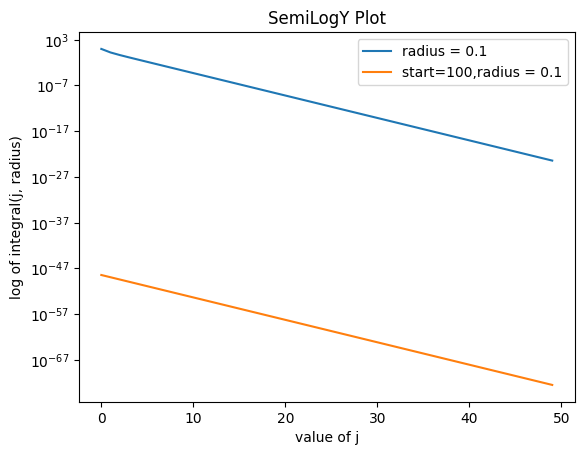

In [38]:
#Plot Integral as Function of j, for radius = 0.1/0.001, 10 orders
import matplotlib.pyplot as plt
N = 50
plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.1)),label="radius = 0.1")
#plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.01)),label="radius = 0.01")
plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.1,100)),label="start=100,radius = 0.1")
#plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.01,200)),label="start=100,radius = 0.01")

plt.legend()
plt.xlabel("value of j")
plt.ylabel("log of integral(j, radius)")
plt.title("SemiLogY Plot")
plt.show()

In [44]:
#Is it possible that the slope is slightly increasing for higher orders? It seems not.
from scipy.stats import linregress
res1 = linregress(np.array([i for i in range(N)]), np.log(np.array(integrate(N,0.1,40))))
res2 = linregress(np.array([i for i in range(N)]), np.log(np.array(integrate(N,0.1,200))))

In [45]:
print(res1)

LinregressResult(slope=-1.1293978528923043, intercept=-43.79541498167394, rvalue=-0.9999999999999997, pvalue=0.0, stderr=4.207334864483418e-09, intercept_stderr=1.1963192507079492e-07)


In [46]:
print(res2)

LinregressResult(slope=-1.1293978528923045, intercept=-224.49907144444265, rvalue=-0.9999999999999999, pvalue=0.0, stderr=2.429105916580399e-09, intercept_stderr=6.906952414329659e-08)


In [42]:
#Final conclusion this is quite good because it seems to indicate x^j behavior as x \to 0
#This not all obvious

In other words it seems that
$$
integral(j, radius) \leq (\xi(radius))^{j}
$$
where $\xi(radius)\to 0$.